### Suppose we have a set of 365 observations with some features like: the date, the time of sunrise, the time of sunset. We're willing to find the trygonometric regression model, so that we could figure the time of sunrise and sunset for each day of the year. The formulas will be as follows:

$$ \hat{S_r}(\textbf{t}) = a_{r} \sin(b_{r}\textbf{t}+c_{r})+d_{r} $$
$$ \hat{S_s}(\textbf{t}) = a_{s}\sin(b_{s}\textbf{t}+c_{s})+d_{s} $$

Let's dive into the finding the coefficient $a_{r}, b_{r}, c_{r}, d_{r}$. Before we explore the calculus features, we need to define the error functions which reasonably describes the (in)accuracy of the prediction. For that purpose, we define error function: 

$ Error(a_{r},b_{r},c_{r},d_{r}) =   \sum_{i=1}^{n}    (Sunrise(i) -  (a_{r} \sin( b_{r}Day(i)+c_{r})) + d_{r}      )^{2} $

The greatest  trouble of our problem is to minimze the above function. It's a multivariable function, inputing 4 values and yielding ones. 
So as to find it's global minima, partial derivatives need to be computed.


### Reading and cleaning the data.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def FormatujGodzinę(Czas:str) -> int:
    godzina, minuta = Czas.split(":")

    return 60*(60*int(godzina) + int(minuta))

       


#Read the data from the table.
linki = [r"https://kalendarz.livecity.pl/wschod-slonca/stycze%C5%84-2023/Wroc%C5%82aw",
         r"https://kalendarz.livecity.pl/wschod-slonca/luty-2023/Wroc%C5%82aw",
         r"https://kalendarz.livecity.pl/wschod-slonca/marzec-2023/Wroc%C5%82aw",
         r"https://kalendarz.livecity.pl/wschod-slonca/kwiecie%C5%84-2023/Wroc%C5%82aw",
         r"https://kalendarz.livecity.pl/wschod-slonca/maj-2023/Wroc%C5%82aw",
         r"https://kalendarz.livecity.pl/wschod-slonca/czerwiec-2023/Wroc%C5%82aw",
         r"https://kalendarz.livecity.pl/wschod-slonca/lipiec-2023/Wroc%C5%82aw",
         r"https://kalendarz.livecity.pl/wschod-slonca/sierpie%C5%84-2023/Wroc%C5%82aw",
         r"https://kalendarz.livecity.pl/wschod-slonca/wrzesie%C5%84-2023/Wroc%C5%82aw",
         r"https://kalendarz.livecity.pl/wschod-slonca/pa%C5%BAdziernik-2023/Wroc%C5%82aw",
         r"https://kalendarz.livecity.pl/wschod-slonca/listopad-2023/Wroc%C5%82aw",
         r"https://kalendarz.livecity.pl/wschod-slonca/grudzie%C5%84-2023/Wroc%C5%82aw"
         ]


Datasets = [ pd.read_html(io = link.replace("2023", str(year)))[0] for link in linki for year in range(2015, 2024)]

UltraDataset = pd.concat(Datasets, axis = 0)

#Zdefiniuj numery dni.
NumeryDni = np.arange(0,len(UltraDataset), 1, dtype = np.int16)%365
#Consider the first three features.


Dataset = UltraDataset.loc[:, "Data wschodu Słońca":"Zachód Słońca"].copy()
#Dodaj kolumnę z numerami dni.
Dataset['Numer dnia'] = NumeryDni

#Sformatuj godziny zachodu i wschodu słońca.
Dataset['Wschód Słońca'] = Dataset['Wschód Słońca'].apply(func = lambda v: FormatujGodzinę(v))
Dataset['Zachód Słońca'] = Dataset['Zachód Słońca'].apply(func = lambda v: FormatujGodzinę(v))



ImportError: Missing optional dependency 'beautifulsoup4'.  Use pip or conda to install beautifulsoup4.

### Visualizing the data.

Text(0, 1, 'Wschód \n słońca')

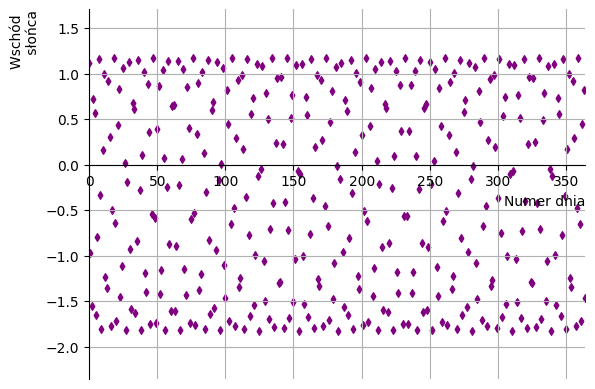

In [69]:
import numpy as np
import matplotlib.pyplot as plt


params = [-3/2, np.sqrt(3), 5, -0.3231]
Days = np.arange(0, 365, 1)
Sunrises = -3/2 * np.sin( np.sqrt(3)*Days + 5) -0.3231
#Define the y margins to visually extend the limits of the y-axis.
y_marg = np.std(Sunrises)/2


OknoFunkcji = plt.figure()
OsieFunkcji = OknoFunkcji.add_subplot()


OsieFunkcji.scatter(Days, Sunrises, 
                    color = "purple", s = 15, marker = "d")

OsieFunkcji.set_xlim(np.min(Days), np.max(Days))
OsieFunkcji.set_ylim(np.min(Sunrises)-y_marg, np.max(Sunrises)+y_marg)

OsieFunkcji.spines[['top','right']].set_visible(False)
OsieFunkcji.spines[['bottom','left']].set_position(('data',0))

OsieFunkcji.grid(True)


OsieFunkcji.set_xlabel("Numer dnia", loc = "right")
OsieFunkcji.set_ylabel("Wschód \n słońca", loc = "top")







### Training the trygonometric regression model.

In [72]:
class TrygRegression():


    def __init__(self, X:np.ndarray, y:np.ndarray, params: list[float],n_repets:int,
                 dx:float = 0.001, lr: float = 0.001, eps: float = 0.001) -> None:
        self.X: np.ndarray = X
        self.y: np.ndarray = y

        self.params:list = params

        self.n_repets = n_repets

        self.dx = dx
        self.lr = lr
        self.eps = eps


    def ErrorFunction(self, params) -> float:
        a,b,c,d = params

        y_hat = a*np.sin(b*self.X+c)+d

        return np.sum((self.y - y_hat)**2)
    


    def ComputeGradient(self,) -> np.ndarray:
        n_params = len(self.params)

        Gradient = np.zeros(shape = [n_params], dtype = np.float64)

        odjemnik = self.ErrorFunction(self.params)


        for i in range(n_params):
            self.params[i] += self.dx

            Derivative = (self.ErrorFunction(self.params) - odjemnik )/self.dx

            Gradient[i] = Derivative

            self.params[i] -= self.dx

        return Gradient
    
    def UpdateParameters(self,m, w, bm:float, bw:float):
        Gradient = self.ComputeGradient()

        #Update the first and the second momentum of the gradient
        m =  bm * m +  Gradient*(1-bm)
        w =  bw * w +  Gradient*Gradient*(1-bw)

        #Then scale them
        self.m  = m/(1-bm)
        self.w  = w/(1-bw)


        #Finaly, update the values of the parameters
        self.params = self.params - self.lr * self.m / (np.sqrt(self.w) + self.eps)
    




    def Train(self,):
        self.m = np.zeros(shape = [len(self.params)], dtype = np.float64)
        self.w = np.zeros(shape = [len(self.params)], dtype = np.float64)


        

        for _ in range(self.n_repets):
            self.UpdateParameters(self.m, self.w, bm = 0.4, bw = 0.4)


    def ReturnParams(self,):
        return self.params
    





Inst = TrygRegression(Days, Sunrises, [0.25, 0.5, 0.1, -3], 1500)

Inst.Train()




    